## Bibliotecas

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Leer dataset

In [28]:
dataset = pd.read_excel("datosProfesores.xlsx")
dataset.head()


,Unnamed: 0,Profesores,Puntuacion,Recomiendad,Dificultad,Etiqueta
0,NaN,OCOTITLA ROJAS NANCY,4.8,0.35,3.6,regular
1,NaN,CHAVARRIA BAEZ LORENA,6.0,0.45,5.3,malo
2,NaN,RODRIGUEZ SARABIA TANIA,5.2,0.42,1.8,bueno
3,NaN,ZAGAL FLORES ROBERTO ESWART,8.0,0.90,3.3,bueno
4,NaN,CATALAN SALGADO EDGAR ARMANDO,5.5,0.48,4.2,malo


## Preprocesamiento de datos

#### Dividir dataset en rasgos y clases

In [29]:
x = dataset.iloc[:, 2:4].values
y = dataset.iloc[:, -1].values

#### Desvalance de datos

In [30]:
# --> Contar valores por clase
valores_por_clase = dataset["Etiqueta"].value_counts()
print(valores_por_clase)

# --> Revisar si el dataset está balanceado
ir = 36/22

if ir > 1.5:
    print("\n\n[+]Desbalanceado")
else:
    print("\n\n[+]Balanceado")


Etiqueta
bueno      36
regular    23
malo       22
Name: count, dtype: int64


[+]Desbalanceado


In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="auto", k_neighbors=5)
x, y = smote.fit_resample(x, y)


In [32]:
# --> Revisar si el dataset está balanceado
data = pd.DataFrame(y)
data.value_counts()

bueno      36
malo       36
regular    36
Name: count, dtype: int64

In [33]:
# --> Valores categóricos en clases
from sklearn.preprocessing import LabelEncoder

encoder_y = LabelEncoder()
y = encoder_y.fit_transform(y)
y.shape


(108,)

In [34]:
# --> Dividir el dataset en conjunto de entrenamiento y conjunto de testing

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)


In [35]:
# --> Escalado de variables

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [36]:
# --> Ajustar el clasificador en el Conjunto de Entrenamiento

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [37]:
# --> Predicción de los resultados con el Conjunto de Testing

y_pred = classifier.predict(x_test)


In [38]:
classifier.score(x_test, y_test)


0.2727272727272727

## Graficar datos

C:\Users\uriel\AppData\Local\Temp\ipykernel_1348\2770449310.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


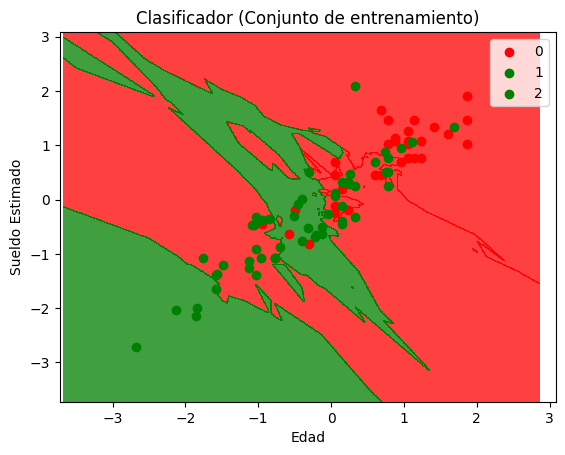

In [40]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(
    np.arange(start=x_set[:, 0].min() - 1,
              stop=x_set[:, 0].max() + 1, step=0.01),
    np.arange(start=x_set[:, 1].min() - 1,
              stop=x_set[:, 1].max() + 1, step=0.01)
)

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.xlim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Clasificador (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Sueldo Estimado')
plt.legend()
plt.show()
